Мы уже знаем, как прибавить и вычесть единицу. Как прибавить произольное число?

# Давайте реализуем `a += 2`, если `b[1] = 1`

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt

In [7]:
# регистр из 3 кубитов для числа a
a = QuantumRegister(3, "a")
b = QuantumRegister(2, "b")
cr = ClassicalRegister(3, "res")
qc = QuantumCircuit(a, b, cr)

# a = 2, 
qc.x(a[1])
# b = суперпозиция  1/sqrt(2)(|0>+|2>)
qc.h(b[1])

qc.barrier()

# a += 2, контролируемое b[1]
qc.ccx(b[1], a[1], a[2])
qc.cx(b[1], a[1])

qc.barrier()

qc.measure(a, cr)
qc.draw()

░            ░ ┌─┐      
  a_0: ──────░────────────░─┤M├──────
       ┌───┐ ░      ┌───┐ ░ └╥┘┌─┐   
  a_1: ┤ X ├─░───■──┤ X ├─░──╫─┤M├───
       └───┘ ░ ┌─┴─┐└─┬─┘ ░  ║ └╥┘┌─┐
  a_2: ──────░─┤ X ├──┼───░──╫──╫─┤M├
             ░ └─┬─┘  │   ░  ║  ║ └╥┘
  b_0: ──────░───┼────┼───░──╫──╫──╫─
       ┌───┐ ░   │    │   ░  ║  ║  ║ 
  b_1: ┤ H ├─░───■────■───░──╫──╫──╫─
       └───┘ ░            ░  ║  ║  ║ 
res: 3/══════════════════════╩══╩══╩═
                             0  1  2

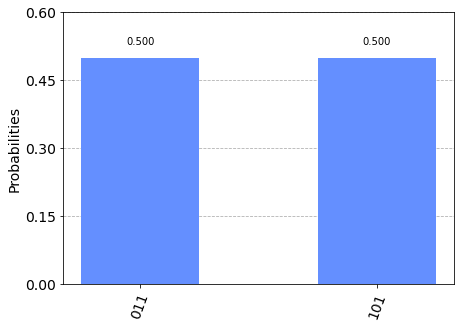

In [21]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=100)
counts = job.result().get_counts(qc)
plot_histogram(counts)

# А теперь усложним.

```
if b[0] == 1 then a += 1
if b[1] == 1 then a += 2
```

In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
import matplotlib.pyplot as plt

In [19]:
a = QuantumRegister(3, "a")
b = QuantumRegister(2, "b")

cr = ClassicalRegister(3, "res")
qc = QuantumCircuit(a, b, cr)

# a = 2, b = |1>+|3>
qc.initialize([0, 0, 1, 0, 0, 0, 0, 0], a)
qc.initialize([0, .5 ** .5, 0, .5 ** .5], b)

qc.barrier()

# напишите здесь a += 1, контролируемое кубитом b[0]
# TODO

qc.barrier()

# напишите здесь a += 2, контролируемое кубитом b[1]
# TODO

qc.barrier()

qc.measure(a, cr)
display(qc.draw())

┌──────────────────────────────┐   ░           ┌───┐ ░            ░ »
  a_0: ──┤0                             ├───░───■────■──┤ X ├─░────────────░─»
         │                              │   ░   │  ┌─┴─┐└─┬─┘ ░      ┌───┐ ░ »
  a_1: ──┤1 Initialize(0,0,1,0,0,0,0,0) ├───░───■──┤ X ├──┼───░───■──┤ X ├─░─»
         │                              │   ░ ┌─┴─┐└─┬─┘  │   ░ ┌─┴─┐└─┬─┘ ░ »
  a_2: ──┤2                             ├───░─┤ X ├──┼────┼───░─┤ X ├──┼───░─»
       ┌─┴──────────────────────────────┴─┐ ░ └─┬─┘  │    │   ░ └─┬─┘  │   ░ »
  b_0: ┤0                                 ├─░───■────■────■───░───┼────┼───░─»
       │  Initialize(0,0.70711,0,0.70711) │ ░                 ░   │    │   ░ »
  b_1: ┤1                                 ├─░─────────────────░───■────■───░─»
       └──────────────────────────────────┘ ░                 ░            ░ »
res: 3/══════════════════════════════════════════════════════════════════════»
                                                                             »
«       ┌─┐      
«  a_0: ┤M├──────
«       └╥┘┌─┐   
«  a_1: ─╫─┤M├───
«        ║ └╥┘┌─┐
«  a_2: ─╫──╫─┤M├
«        ║  ║ └╥┘
«  b_0: ─╫──╫──╫─
«        ║  ║  ║ 
«  b_1: ─╫──╫──╫─
«        ║  ║  ║ 
«res: 3/═╩══╩══╩═
«        0  1  2

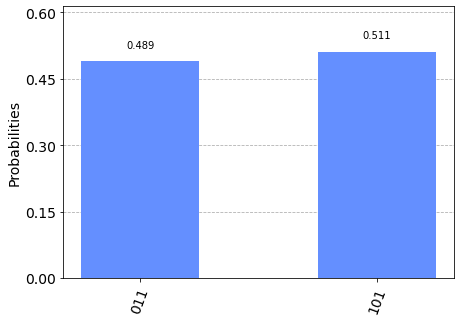

In [20]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(qc)
plot_histogram(counts)

[решение](Q62R_Summator_Solution.ipynb)